<small><font color=gray>Notebook author: <a href="https://www.linkedin.com/in/olegmelnikov/" target="_blank">Oleg Melnikov</a> ©2021 onwards</font></small><hr style="margin:0;background-color:silver">


**[<font size=6>🔢Recogn17er</font>](https://www.kaggle.com/competitions/oct-9-22recogn17er/rules)**. [**Instructions**](https://colab.research.google.com/drive/1riOGrE_Fv-yfIbM5V4pgJx4DWcd92cZr#scrollTo=ITaPDPIQEgXV) for running Colabs.

<small>**(Optional) CONSENT.** <mark>[ X ]</mark> We consent to sharing our Colab (after the assignment ends) with other students/instructors for educational purposes. We understand that sharing is optional and this decision will not affect our grade in any way. <font color=gray><i>(If ok with sharing your Colab for educational purposes, leave "X" in the check box.)</i></font></small>

The data set is similar to [MNIST](https://en.wikipedia.org/wiki/MNIST_database) with each row as a flattened image. However, the digits are not hand-written, but distorted, scaled, shifted, etc.

* `dfYX` contains labels (1 or 7) in the first column and pixel brightness intensities in other columns. Each row's 1024 features can be reshaped to 32x32 images of digits
* `dfX ` contains images (as row vectors) only and no labels. Your trained model will derive the labels for these test images. Then you'll submit these to Kaggle.com

In [ ]:
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
RunTimeLimit, t0 = 60, time.time() # time limit for your model and starting time
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

pd.set_option('display.max_rows', 100, 'display.max_columns', 100, 'display.max_colwidth', 100, 'display.precision', 2, 'display.max_rows', 4)
sFile = 'https://github.com/omelnikov/data/blob/main/Recogn17er/trainYX.zip?raw=true'
dfYX = pd.read_csv(sFile, compression='zip', index_col='id')
dfYX

,y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
1,1,216,226,255,212,241,255,255,237,236,255,188,255,255,255,191,255,255,251,192,246,255,247,255,247,255,223,255,247,238,209,255,255,255,255,177,246,255,255,207,245,255,228,215,227,255,228,255,255,250,...,255,255,250,217,255,246,235,255,223,255,255,255,162,255,255,243,157,255,216,226,255,212,241,255,255,237,236,255,188,255,255,255,191,255,255,251,192,246,255,247,255,247,255,223,255,247,238,209,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,1,255,241,255,199,243,240,255,255,194,255,228,255,213,249,215,255,255,215,249,213,255,228,255,194,255,255,240,243,199,255,241,255,255,244,255,205,236,247,255,255,193,255,231,255,217,245,217,255,255,...,217,255,255,217,245,217,255,231,255,193,255,255,247,236,205,255,244,255,255,241,255,199,243,240,255,255,194,255,228,255,213,249,215,255,255,215,249,213,255,228,255,194,255,255,240,243,199,255,241,255
2699,1,255,239,255,240,255,255,249,255,240,255,242,255,255,255,255,252,252,255,255,255,255,242,255,240,255,249,255,255,240,255,239,255,239,255,240,255,251,253,255,248,255,238,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,238,255,248,255,253,251,255,240,255,239,255,239,255,240,255,255,249,255,240,255,242,255,255,255,255,252,252,255,255,255,255,242,255,240,255,249,255,255,240,255,239,255


This test file is missing a column of digit labels, which you need to predict

In [ ]:
dfX = pd.read_csv('https://github.com/omelnikov/data/blob/main/Recogn17er/testX.zip?raw=true', compression='zip', index_col='id')
dfX

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2700,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
2701,230,245,231,233,246,240,247,231,234,255,235,231,233,252,241,242,247,228,244,226,223,228,243,224,250,230,234,241,237,239,222,217,255,225,222,246,251,245,222,243,248,234,247,228,235,231,234,232,234,238,...,238,240,234,244,225,227,227,235,232,215,243,254,223,227,244,219,248,245,236,236,237,230,240,229,237,237,236,243,232,250,241,238,251,247,237,241,228,242,246,230,232,250,232,227,233,220,238,235,228,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,229,226,240,228,235,222,232,225,238,250,238,234,231,237,250,244,222,243,245,242,234,203,232,219,244,240,232,230,226,234,238,239,223,243,221,235,234,248,229,252,243,233,243,229,242,236,241,244,230,238,...,222,237,240,250,238,244,243,241,234,227,243,255,223,238,238,240,224,238,235,240,223,247,236,222,231,238,247,239,227,232,248,237,239,222,239,251,236,238,222,232,225,237,250,218,228,238,222,225,250,243
4499,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


Here are the first few digits.

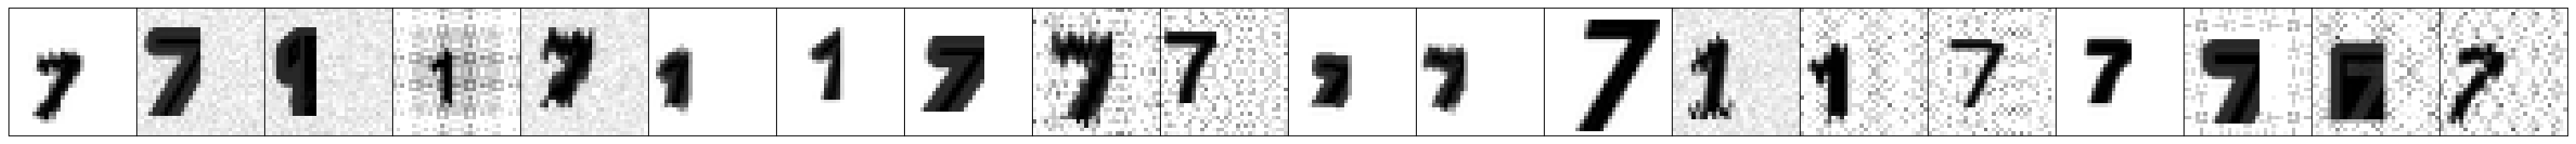

In [ ]:
X = dfX.values
n_col, w = 20, 32
_ = plt.figure(figsize=(30,12))
for i in range(n_col):
    ax = plt.subplot(1, n_col, i + 1)
    _ = plt.imshow(X[i,].reshape(w,w).astype('float'), cmap='gray')
    _, _ = plt.xticks([]), plt.yticks([]);
_ = plt.tight_layout(pad=0)
_ = plt.show()

In [ ]:
tmr = Timer()

⏳ started. You have 60 sec. Good luck!


<hr color=red>

<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer - All Start Here...</font></strong>

**Student's Section** (between ⏳ symbols): add your code and documentation here.

## **Task 1. Preprocessing Pipeline**

Explain elements of your preprocessing pipeline i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.
1. Why did you choose these elements? (Something in EDA, prior experience,...? Btw, EDA is not required)
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

# Task 1:

**<font color='orange'>Task:</font>**

The dataset with digit images that has the distorted and transformed images, where each row represents a flattened image of 32x32 pixels. The train file contains labels (1 or 7) in the first column and pixel intensities in the remaining columns, while the test file contains images without labels.


**<font color='orange'>Overall Description:</font>**

* The algorithm that was choosen for  this task is the gradiend boosting classifier. Before using the model additional prepocessing for the image recognition task was done that has included several elements. The image preprocessing  pipeline included the noise reduction, thresholding, contour handling, and resizing to ensure the digits are properly centered and normalized.

**<font color='orange'>Preprocessing Function (preprocess_image):</font>**


* Gaussian Blur: Applies Gaussian blur using a 3x3 kernel to reduce noise in the input image.
* Adaptive Thresholding: Is used to convert the blurred image to a binary image using adaptive thresholding, enhancing contrast.
* Contour Analysis: Identifies contours and filters them based on their area and extent to keep only those likely to be digits.
* Masking and Morphological Operations: Uses a mask to keep desired contours and performs  closing to fill gaps in the digits.
* Resizing: Resizes the processed image to a 28x28 pixel grid, a common size for digit recognition tasks.
All of this operations gave the suitable format for teh usage of teh data in the next steps

**<font color='orange'>The Effectiveness:</font>**

* The effectivenes of the usage of such teh preprocessing algorithms was evaluated by using  the Visual inspection of sample images before and after each step  to have the qualitative insights. Overall significant reduction in noise was achieved by image preprocessing which increased the effetiveness of our ML model.

**<font color='orange'>More Thoughts:</font>**

* Overall, in these kind of tasks is often the cnn are used. Of course, while the techniques that we have suggested might not capture complex relationships or learn high-level features like CNNs, they are effective in enhancing raw image data for classical machine learning models. CNN in image recognition would help in discovering relationships between neighbouring pixels, which is. difficult to achieve with a non-nn classifier.


## **Task 2. Modeling Approach**
Explain your modeling approach, i.e. ideas you tried and why you thought they would be helpful.

1. How did these decisions guide you in modeling?
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

# Task 2

* The method that was used is the  a Gradient Boosting Classifier for a digit recognition task after preprocessing the image data with the hyper parameter tuning using the  Grid-Search that tries to effectively find  the best combination of hyperparameters using cross-validation to enhance the Gradient Boosting Classifier's performance. Gradient boosting is a highly effective model since it trains an ensembe of models focusing on the weak learners which in turn generates state-of-the-art performance.

* Comparing  to classical machine learning approaches like k-NN, SVMs, or decision trees, Gradient Boosting often exhibits superior performance in digit recognition tasks due to its ability to handle complex relationships, noise, and its ensemble-based learning structure that leverages multiple weak learners to create a strong predictive model. For model scoring the accuracy was used. Also there are advantages like the robustness to noise, feature importance selection and stability.

* We think that the GB is the most effective tool for the task at hand since there are a lot of complex relationships between the features.

* Additionally other classifiers have been tried (KNN, LDA and so on), all of them generated models which were less effective than the gradient boosting. Nonetheless, we have read in Hastie et al that using a KNN with tangential loss may result in a highl effective classifier.  

**Student's answer:**

Below is a baseline model that produces the result on Kaggle leaderboard (LB).

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def preprocess_image(image):
#     blur = cv2.GaussianBlur(image, (3, 3), 0)
#     binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
#                                    cv2.THRESH_BINARY_INV, 11, 8)
#     contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     mask = np.zeros_like(binary)
#     for contour in contours:
#         if cv2.contourArea(contour) > 30:  # Only consider contours above a certain area
#             cv2.drawContours(mask, [contour], -1, (255), thickness=-1)
#     processed_image = cv2.bitwise_and(binary, mask)
#     resized = cv2.resize(processed_image, (28, 28), interpolation=cv2.INTER_AREA)
#     return resized

# def process_and_plot(X, w, h):
#     preprocessed_data = np.array([preprocess_image(image.reshape(w, w).astype('uint8')) for image in X[:20]])
#     fig, axes = plt.subplots(4, 5, figsize=(10, 8))  # 4x5 grid for 20 images
#     for i, ax in enumerate(axes.ravel()):
#         ax.imshow(preprocessed_data[i].reshape(28, 28), cmap='gray', interpolation='nearest')
#         ax.axis('off')
#     plt.tight_layout()
#     plt.show()
# process_and_plot(X, 32, 32)


In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def preprocess_image(image):
#     # Slightly more aggressive Gaussian Blur to smooth out more noise
#     blur = cv2.GaussianBlur(image, (3, 3), 0)

#     # Adjusted adaptive thresholding
#     binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
#                                    cv2.THRESH_BINARY_INV, 11, 2)

#     # Find contours and fill the ones that are too small to be digits
#     contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     for contour in contours:
#         if cv2.contourArea(contour) < 30:  # Threshold for noise
#             cv2.drawContours(binary, [contour], -1, (0, 0, 0), thickness=-1)

#     # Instead of resizing, normalize the size of the digit within the image
#     moments = cv2.moments(binary)
#     if moments['m00'] != 0:
#         cx = int(moments['m10']/moments['m00'])  # Centroid x
#         cy = int(moments['m01']/moments['m00'])  # Centroid y
#         dX = max(cx, 32 - cx)
#         dY = max(cy, 32 - cy)
#         padding = max(dX, dY)

#         # Pad the edges to keep the digit centered
#         padded = cv2.copyMakeBorder(binary, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=[0,0,0])
#         resized = cv2.resize(padded, (28, 28), interpolation=cv2.INTER_AREA)
#     else:
#         resized = cv2.resize(binary, (28, 28), interpolation=cv2.INTER_AREA)

#     return resized

# # Function to process the images and plot the first 20
# def process_and_plot(X, w, h):
#     # Process the first 20 images to save memory
#     preprocessed_data = np.array([preprocess_image(image.reshape(w, w).astype('uint8')) for image in X[:20]])

#     # Plot the first 20 images
#     fig, axes = plt.subplots(4, 5, figsize=(10, 8))  # 4x5 grid for 20 images
#     for i, ax in enumerate(axes.ravel()):
#         ax.imshow(preprocessed_data[i].reshape(28, 28), cmap='gray', interpolation='nearest')
#         ax.axis('off')
#     plt.tight_layout()
#     plt.show()

# # Call the function with your dataset and the dimensions of the images
# process_and_plot(X, 32, 32)


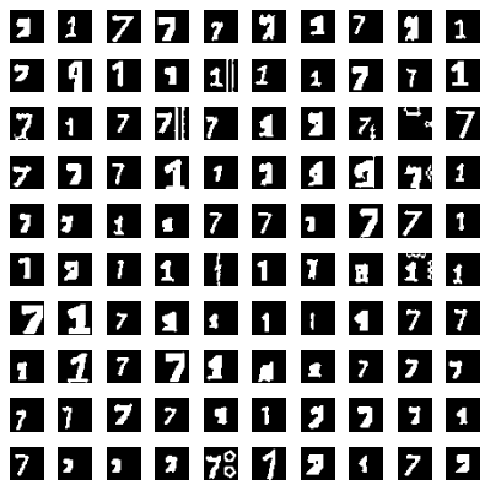

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    # Apply Gaussian Blur with a smaller kernel
    blur = cv2.GaussianBlur(image, (3, 3), 0)

    # Adaptive thresholding with tuned parameters
    binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 9, 5)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Analyze contours and keep those that are likely to be digits
    mask = np.zeros_like(binary)
    for contour in contours:
        area = cv2.contourArea(contour)
        x, y, w, h = cv2.boundingRect(contour)
        extent = float(area) / (w * h)
        if 20 < area < 1000 and 0.2 < extent < 0.9:  # Only keep contours that meet these criteria
            cv2.drawContours(mask, [contour], -1, (255), thickness=-1)

    # Use the mask to keep only the desired contours
    processed_image = cv2.bitwise_and(binary, mask)

    # Apply morphological closing to close small holes and gaps in the digits
    kernel = np.ones((2, 2), np.uint8)
    closing = cv2.morphologyEx(processed_image, cv2.MORPH_CLOSE, kernel)

    # Resize the image to 28x28 pixels
    resized = cv2.resize(closing, (28, 28), interpolation=cv2.INTER_AREA)
    return resized

# Function to process the images and plot the first 20
def process_and_plot(X, w, h):
    # Process the first 20 images to save memory
    preprocessed_data = np.array([preprocess_image(image.reshape(w, w).astype('uint8')) for image in X[:100]])

    # Plot the first 20 images
    fig, axes = plt.subplots(10, 10, figsize=(5, 5))  # 4x5 grid for 20 images
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(preprocessed_data[i].reshape(28, 28), cmap='gray', interpolation='nearest')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function with your dataset and the dimensions of the images
process_and_plot(dfYX.drop("y", axis=1).values, 32, 32)


In [ ]:
dfYX.shape
dfX.shape
# X_train.shape
X.shape

(2700, 1025)

(1800, 1024)

(1800, 1024)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming 'w' is the width and height of the images before flattening
w = 32
h = 32

# Define the preprocess_image function here (make sure it is defined correctly as per your needs)

# Preprocess the image data
X = np.array([preprocess_image(image.reshape(w, w).astype('uint8')) for image in dfYX.drop("y", axis=1).values])

# Labels
y = dfYX.y.values

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)
num_samples, width, height = X_train.shape
X_train = X_train.reshape(num_samples, -1)
num_samples, width, height = X_test.shape
X_test = X_test.reshape(num_samples, -1)

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=5, random_state=42)

# Train the classifier
gb_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = gb_clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_estimators=200,
                           random_state=42)

Accuracy: 100.00%


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid you want to search over
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees
#     'learning_rate': [0.4, 0.5, 0.6],  # Learning rate
#     'max_depth': [4, 5, 6, 7]  # Maximum depth of each tree
# }

# # Initialize the Gradient Boosting classifier
# gb_clf = GradientBoostingClassifier(random_state=42)

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# # Fit the grid search to your data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f'Best Parameters: {best_params}')
# print(f'Best Score: {best_score * 100:.2f}%')


In [ ]:
X_t = np.array([preprocess_image(image.reshape(w, w).astype('uint8')) for image in dfX.values])
num_samples, width, height = X_t.shape
X_t = X_t.reshape(num_samples, -1)

pY = dfX[['1']].rename(columns={'1':'y'}).copy()*0
pY['y'] = gb_clf.predict(X_t)
pY.to_csv('LR_KNN_baseline.csv')

tm = time.time()-t0
msg = f'Runtime is {tm:.1f}sec'
print(f'\033[91m\033[1m' + msg + f' and exceeds assignment limit of {RunTimeLimit}sec!!!\033[0m' if tm > RunTimeLimit else msg)

Runtime is 52.4sec


# **References:**

1. https://www.kaggle.com/code/ilialar/hyperparameters-tunning-with-hyperopt#Hyperopt (https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fwww.kaggle.com%2Fcode%2Filialar%2Fhyperparameters-tunning-with-hyperopt%23Hyperopt)
1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An introduction to statistical learning: With applications in Python. Springer.
1. Hastie, T. (2011). The elements of statistical learning, Hastie, 2nd edition. Springer.
1. https://en.wikipedia.org/wiki/Hyperparameter_optimization#Bayesian_optimization (https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FHyperparameter_optimization%23Bayesian_optimization)

<font size=5>⌛</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>

<hr color=red>


In [ ]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

Runtime is 46 sec


In [ ]:
dfX.shape

(1800, 1024)

## 💡**Starter Ideas**

1. Tune model hyperparameters
1. Try to linear and non-linear feature normalization: shift/scale, log, divide features by features (investigate scatterplot matrix)
1. Try higher order feature interactions and polynomial features on a small subsample. Then identify key features or select key principal components. The final model can be trained on a larger or even full training sample. You can use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the feature set
1. Do a thorough EDA: look for feature augmentations that result in linear decision boundaries between pairs of classes.
1. Evaluate predictions and focus on poorly predicted "groups":
  1. Strongest missclassifications. E.g. the model is very confident about the wrong label
  1. Evaluate predictions near decision boundaries.
1. Do scatter plots show piecewise linear shape? Can a separate linear model be used on each support, or can the pattern be linearized via transformations?
1. Learn about MNIST dataset and related models.